In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading and reading the data
data = pd.read_csv("D:/Upgrad - Executive PG in ML & AI/Case Study/EDA/loan/loan.csv")
data.head()

C:\Users\ANKUR SINGH\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
data.shape

(39717, 111)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Checking for misssing value
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
data.isnull().sum()/data.shape[0]*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [7]:
# Checking column with large amount of null values(in percentage) and irrelevant columns
(data.isnull().sum()/data.shape[0]*100).round(2).sort_values(ascending=False)

total_il_high_credit_limit    100.0
mo_sin_old_rev_tl_op          100.0
bc_util                       100.0
bc_open_to_buy                100.0
avg_cur_bal                   100.0
                              ...  
pub_rec                         0.0
open_acc                        0.0
inq_last_6mths                  0.0
earliest_cr_line                0.0
id                              0.0
Length: 111, dtype: float64

In [8]:
# Removing column with 50% or more null values as it will reduce the impact on analysis
data = data.loc[:,data.isnull().sum()/data.shape[0]*100<50]


In [9]:
# Shape of the dataframe after removing columns
data.shape

(39717, 54)

In [10]:
# Checking for missing values across the rows
(data.isnull().sum(axis=1)).max()

6

In [11]:
data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs","out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis = 1, inplace = True)

In [12]:
# Shape of the dataframe after removing columns
data.shape

(39717, 33)

In [13]:
data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

## The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
#### therfore, removing loan_status with Current 


In [14]:
data = data[data.loan_status != 'Current']
data.shape

(38577, 33)

In [15]:
data.drop([
'application_type',
'earliest_cr_line',
'inq_last_6mths',
'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'total_acc'],axis=1, inplace = True)

In [16]:
#data.drop([
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'purpose',
'loan_amnt',
'funded_amnt_inv',
'int_rate',
'loan_status',
'grade',
'sub_grade',
'dti',
'issue_d',
'term',
'installment'
#],axis=1, inplace = True)

'installment'

In [17]:
data.shape

(38577, 25)

In [18]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,wedding,11.20,f,0.0,1,0,0.0,0,0.0,0.0


In [19]:
# Correcting data type and format for columns in the dataframe
## Derving more columns with the conversion of data type
data.issue_d=pd.to_datetime(data.issue_d,format='%b-%y')
data['issue_year']=pd.to_datetime(data.issue_d,format='%b-%y').dt.year
data['issue_month']=pd.to_datetime(data.issue_d,format='%b-%y').dt.month


In [20]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_year,issue_month
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,f,0.0,1,0,0.0,0,0.0,0.0,2011,12
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,f,0.0,1,0,0.0,0,0.0,0.0,2011,12
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,f,0.0,1,0,0.0,0,0.0,0.0,2011,12
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,f,0.0,1,0,0.0,0,0.0,0.0,2011,12
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,f,0.0,1,0,0.0,0,0.0,0.0,2011,12


In [21]:
type('months')

str

In [22]:
data.term=data.term.apply(lambda x: str(x).replace(' months','')).astype(int)
data.int_rate=data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
data.grade=data.grade.astype('category')
data.sub_grade=data.sub_grade.astype('category')
data.emp_length=data.emp_length.apply(lambda x: str(x).replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
data.home_ownership=data.home_ownership.astype('category')
data.verification_status=data.verification_status.astype('category')

In [23]:
# selecting columns based on domain knowledge
## Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
data = data[['loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','dti','pub_rec_bankruptcies','issue_year','issue_month']]


In [24]:
data.shape

(38577, 15)

 # Univariate Analysis

In [25]:
# Loan status 
data.loan_status.value_counts()*100/data.loan_status.count()


Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

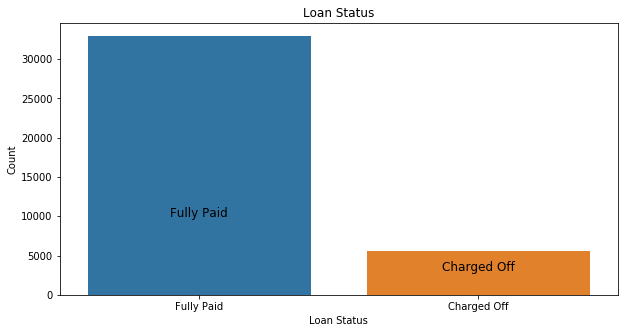

In [26]:
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(data.loan_status)
ax.annotate('Fully Paid',xy=(0.25,0.3),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.annotate('Charged Off',xy=(0.75,0.1),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

36    75.42318
60    24.57682
Name: term, dtype: float64


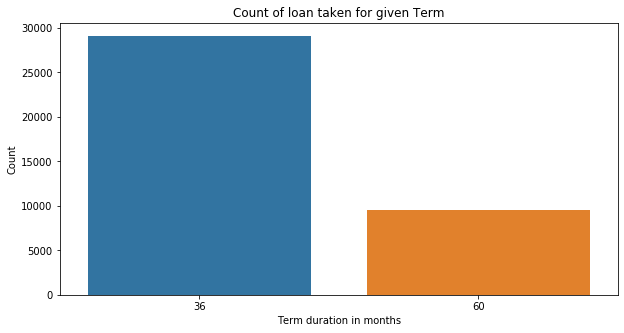

In [52]:
# Term of loan 
print(data.term.value_counts()*100/data.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(data.term)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

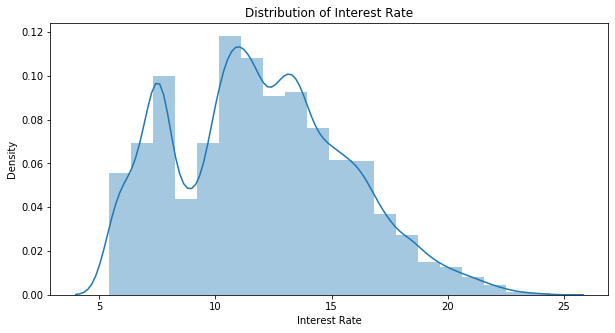

In [27]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(data.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

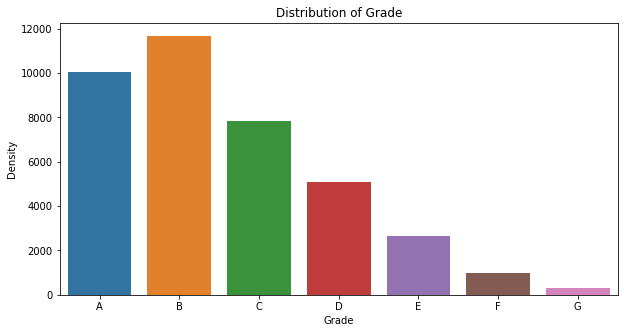

In [28]:
# Distribution of Grade
plt.figure(figsize=(10,5))
sns.countplot(data.grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

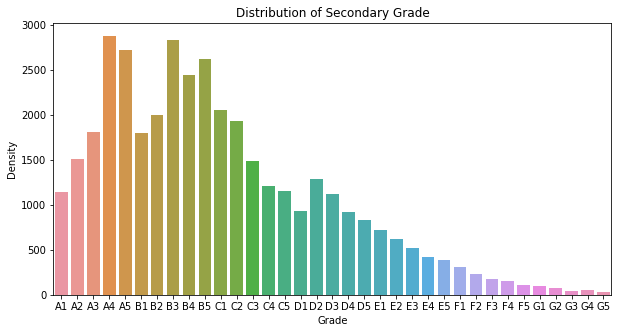

In [29]:
# Distribution of Greade
plt.figure(figsize=(10,5))
sns.countplot(data.sub_grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

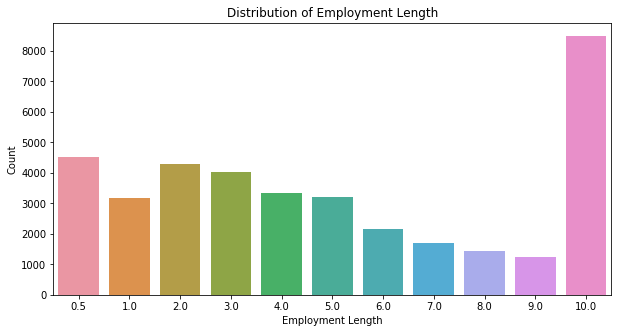

In [30]:
# Distribution of emp_length
plt.figure(figsize=(10,5))
sns.countplot(data.emp_length)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)
plt.show()

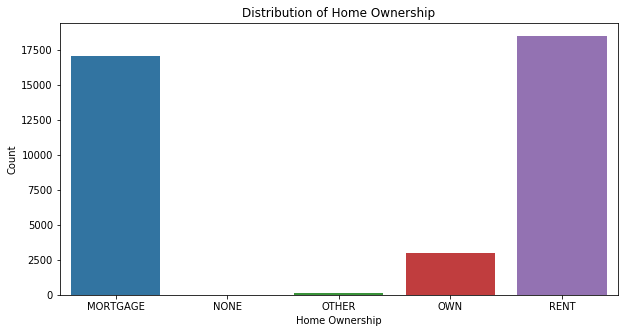

In [31]:
# Distribution of home_ownership
plt.figure(figsize=(10,5))
sns.countplot(data.home_ownership)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

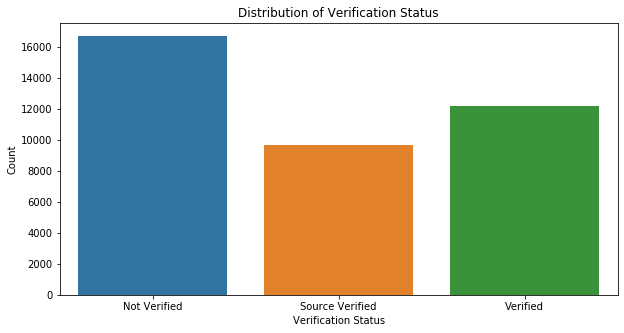

In [32]:
# Distribution of verification_status
plt.figure(figsize=(10,5))
sns.countplot(data.verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()

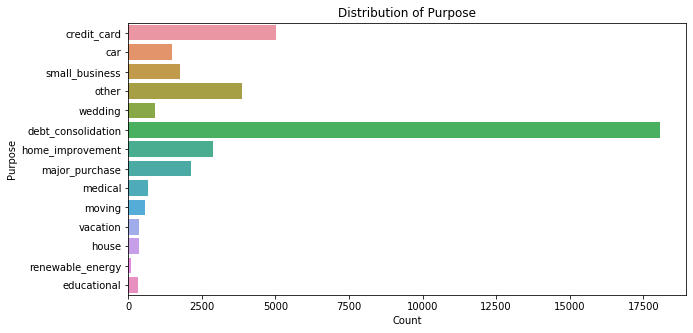

In [33]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=data.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

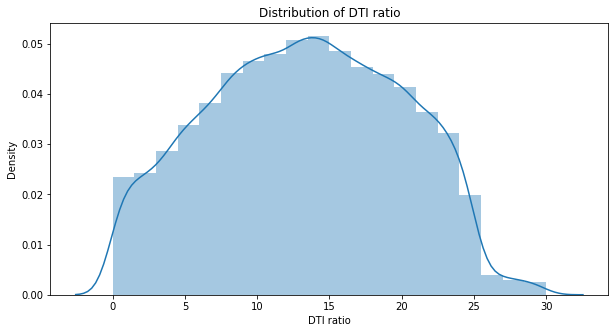

In [34]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(data.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

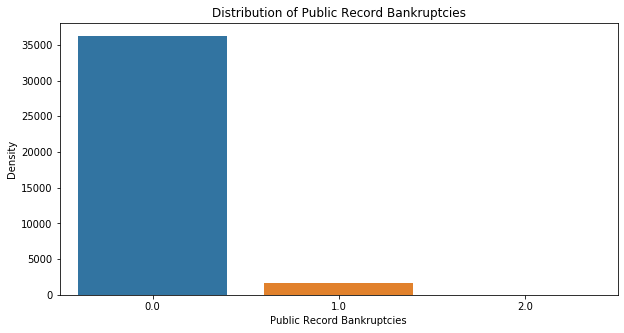

In [35]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.countplot(data.pub_rec_bankruptcies)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

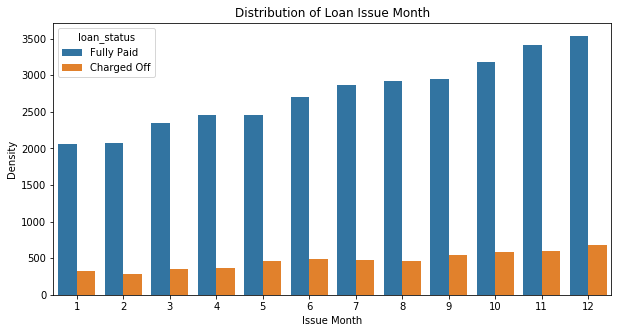

In [36]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(data.issue_month,hue=data.loan_status)
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

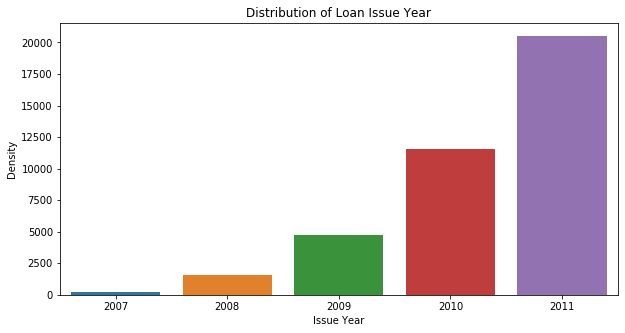

In [37]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(data.issue_year)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

## Segmented Univariate Analysis

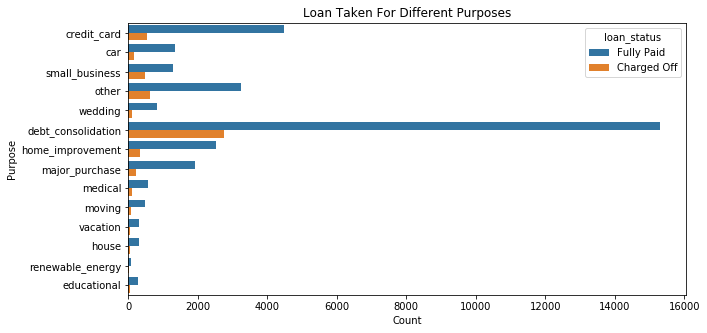

In [38]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=data,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

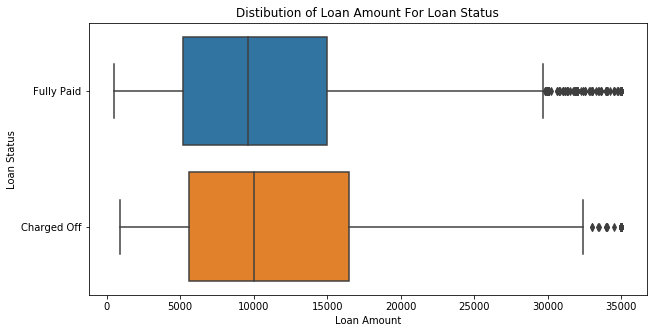

In [39]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

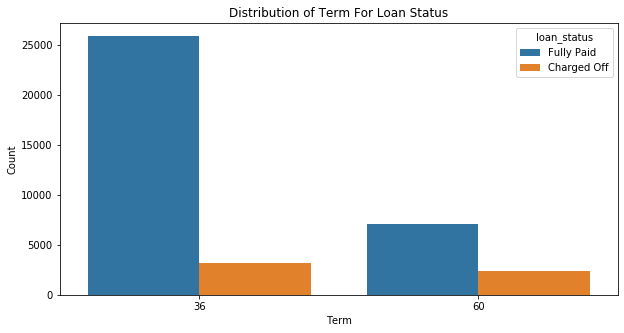

In [40]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

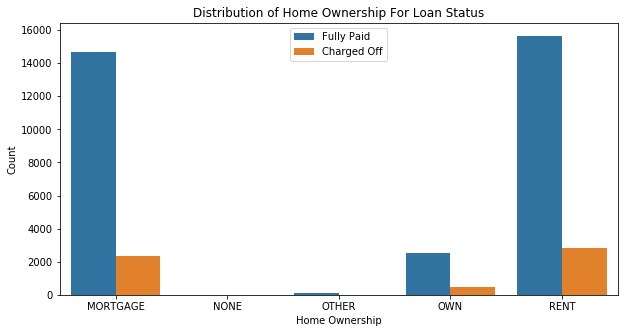

In [42]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

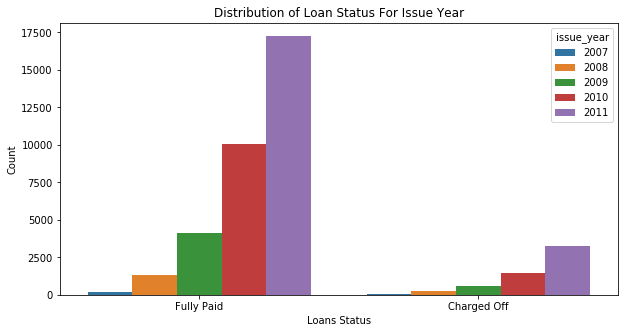

In [47]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

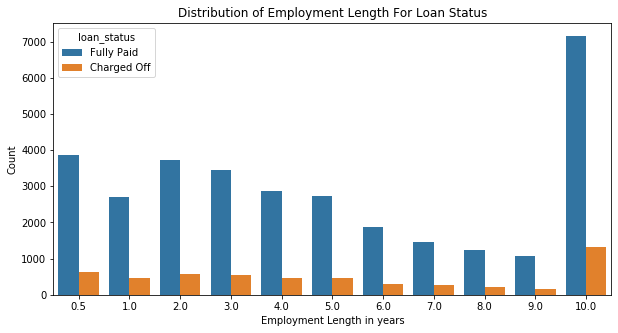

In [48]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

## Bivariate Analysis

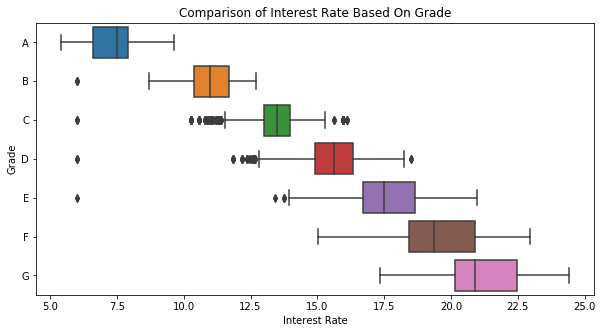

In [49]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

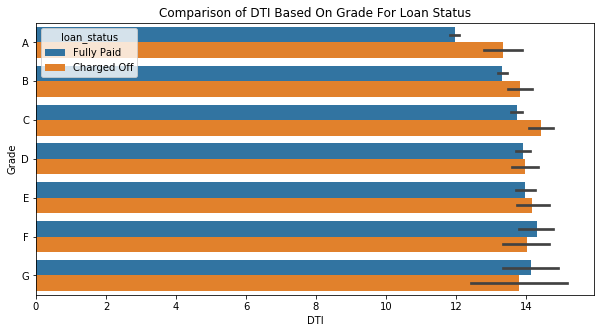

In [50]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

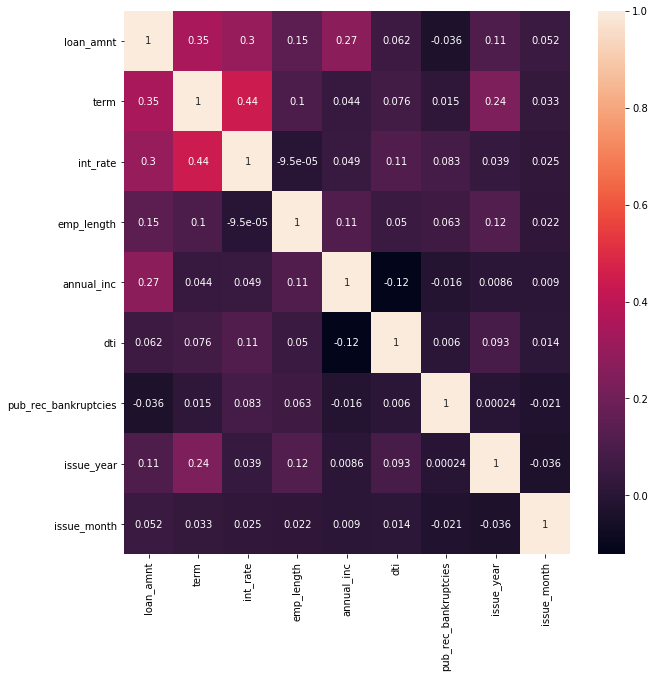

In [51]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Insights
### Univariate Analysis
 - The number of defaulted loan is 7 times less than the number of fully paid loan.
 - The majority of loan has a term of 36 months compared to 60 months.
 - The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
 - A large amoutn of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.
 - Majority of borrowsers have working experience greater than 10 years.
 - Majority of borrowsers don't posses property and are on mortage or rent.
 - About 50% of the borrowers are verified by the company or have source verified.
 - A large percentage of loans are taken for debt consolidation followed by credit card.
 - Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
 - Majority of the borrowers have no record of Public Recorded Bankruptcy.
 - Majority of the loans are given in last quarter of the year.
 - The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis
 - Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
 - The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
 - The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
 - The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
 - The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
 - The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis
 - The Grade represent risk factor thus we can say interst rate increases with the risk.
 - The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
 - The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

Recommendations
- Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
    1. DTI 
    2. Grades
    3. Verification Status
    4. Annual income
    5. Pub_rec_bankruptcies
- Other considerations for 'defaults' :
    1. Burrowers not from large urban cities like california, new york, texas, florida etc. 
    2. Burrowers having annual income in the range 50000-100000.
    3. Burrowers having Public Recorded Bankruptcy.
    4. Burrowers with least grades like E,F,G which indicates high risk.
    5. Burrowers with very high Debt to Income value.
    6. Burrowers with working experience 10+ years.